In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,a386a_00000,0,262.047455,bald,1,106582.136131
1,1,a386a_00000,1,1921.875732,bald,1,106582.136131
2,2,a386a_00000,2,747.716431,bald,1,106582.136131
3,3,a386a_00000,3,628.851807,bald,1,106582.136131
4,4,a386a_00000,4,640.057556,bald,1,106582.136131
...,...,...,...,...,...,...,...
19995,19995,a386a_00024,795,122.133041,random,5,107433.484978
19996,19996,a386a_00024,796,122.139267,random,5,107433.484978
19997,19997,a386a_00024,797,121.929100,random,5,107433.484978
19998,19998,a386a_00024,798,121.919083,random,5,107433.484978


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
16000,16000,a386a_00020,0,262.047455,random,1,109259.900276
16001,16001,a386a_00020,1,978.350708,random,1,109259.900276
16002,16002,a386a_00020,2,517.242676,random,1,109259.900276
16003,16003,a386a_00020,3,453.093933,random,1,109259.900276
16004,16004,a386a_00020,4,384.927734,random,1,109259.900276
...,...,...,...,...,...,...,...
19995,19995,a386a_00024,795,122.133041,random,5,107433.484978
19996,19996,a386a_00024,796,122.139267,random,5,107433.484978
19997,19997,a386a_00024,797,121.929100,random,5,107433.484978
19998,19998,a386a_00024,798,121.919083,random,5,107433.484978


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_34332/3751056101.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 1 for label in current_xticks])


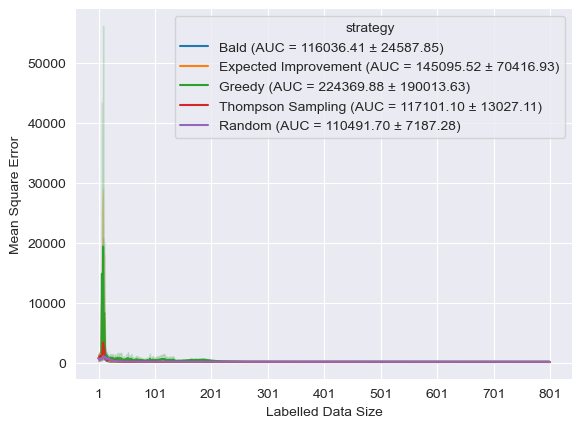

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 1 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)